In [1]:
# basics
import pandas as pd
import numpy as np
import time

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for simulations
from functools import partial
from multiprocessing import Pool
from functions import simulate_game, pick_random_dice, pick_frequent_dice, pick_random_score, pick_max_score

# remove
from functions import pick_dice, pick_score

In [2]:
simulate_game_random = partial(simulate_game, dice_decision_function = pick_random_dice, score_decision_function = pick_random_score)
simulate_game_frequent_max = partial(simulate_game, dice_decision_function = pick_frequent_dice, score_decision_function = pick_max_score)

## Test for optimal number of workers

,workers,time
0,2,1.417955
1,4,0.954547
2,6,0.854688
3,8,0.716840
4,10,0.766107
5,12,0.680348
6,14,0.698458
7,16,0.804576
8,18,0.747254
9,20,0.858756


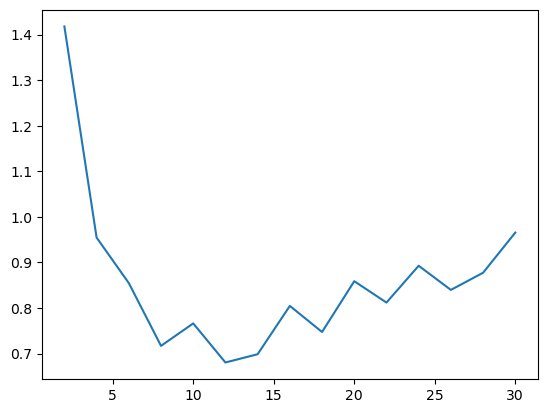

In [3]:
n_sims = 10**3

times = pd.DataFrame()

for workers in np.linspace(2, 30, 15):
    workers = int(workers)

    start = time.perf_counter()
    if __name__ == '__main__':
        with Pool(workers) as p:
            full_data = p.map(simulate_game_frequent_max, range(1, n_sims+1))
    end = time.perf_counter()

    result = pd.DataFrame({'workers': workers, 'time': end - start}, index=[0])
    times = pd.concat([times, result], ignore_index=True)

display(times)

plt.plot(times.workers, times.time)

In [4]:
workers = 12
n_sims = 10**3

if __name__ == '__main__':
    with Pool(workers) as p:
        full_data = p.map(simulate_game_frequent_max, range(1, n_sims+1))

full_data = [turn for game in full_data for turn in game]

In [5]:
training_df = pd.DataFrame(full_data)

training_df

,game,turn,pre_total_score,hand_1,dice_picks_1,hand_2,dice_picks_2,hand_3,chosen_score_type,turn_score,...,threes_potential,fours_potential,fives_potential,sixes_potential,three_kind_potential,four_kind_potential,full_house_potential,small_straight_potential,large_straight_potential,yahtzee_potential
0,1,1,0,"[6, 5, 5, 5, 4]","[0, 1, 1, 1, 0]","[5, 5, 5, 2, 1]","[1, 1, 1, 0, 0]","[6, 5, 5, 5, 2]",chance,23,...,0,0,15,6,23,0,0,0,0,0
1,1,2,23,"[5, 5, 3, 2, 2]","[1, 1, 0, 1, 1]","[5, 5, 5, 2, 2]","[1, 1, 1, 1, 1]","[5, 5, 5, 2, 2]",full_house,25,...,0,0,15,0,19,0,25,0,0,0
2,1,3,48,"[6, 5, 4, 3, 1]","[0, 0, 0, 0, 0]","[5, 5, 3, 3, 3]","[1, 1, 1, 1, 1]","[5, 5, 3, 3, 3]",three_kind,19,...,9,0,10,0,19,0,-1,0,0,0
3,1,4,67,"[6, 5, 3, 3, 2]","[0, 0, 1, 1, 0]","[6, 3, 3, 2, 1]","[0, 1, 1, 0, 0]","[3, 3, 2, 2, 1]",threes,6,...,6,0,0,0,-1,0,-1,0,0,0
4,1,5,73,"[6, 5, 3, 3, 2]","[0, 0, 1, 1, 0]","[5, 3, 3, 3, 1]","[0, 1, 1, 1, 0]","[5, 3, 3, 3, 2]",fives,5,...,-1,0,5,0,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,1000,9,148,"[5, 5, 5, 4, 1]","[1, 1, 1, 0, 0]","[5, 5, 5, 3, 1]","[1, 1, 1, 0, 0]","[5, 5, 5, 5, 3]",four_kind,23,...,3,-1,20,-1,-1,23,-1,0,0,-1
12996,1000,10,171,"[4, 3, 1, 1, 1]","[0, 0, 1, 1, 1]","[3, 1, 1, 1, 1]","[0, 1, 1, 1, 1]","[5, 1, 1, 1, 1]",fives,5,...,0,-1,5,-1,-1,-1,-1,0,0,-1
12997,1000,11,176,"[4, 4, 3, 1, 1]","[1, 1, 0, 1, 1]","[4, 4, 2, 1, 1]","[1, 1, 0, 1, 1]","[5, 4, 4, 1, 1]",threes,0,...,0,-1,-1,-1,-1,-1,-1,0,0,-1
12998,1000,12,176,"[6, 4, 4, 3, 2]","[0, 1, 1, 0, 0]","[6, 4, 4, 4, 1]","[0, 1, 1, 1, 0]","[5, 4, 4, 4, 2]",small_straight,0,...,-1,-1,-1,-1,-1,-1,-1,0,0,-1


In [6]:
training_df.dtypes

game                          int64
turn                          int64
pre_total_score               int64
hand_1                       object
dice_picks_1                 object
hand_2                       object
dice_picks_2                 object
hand_3                       object
chosen_score_type            object
turn_score                    int64
post_total_score              int64
chance_score                float64
ones_score                  float64
twos_score                  float64
threes_score                float64
fours_score                 float64
fives_score                 float64
sixes_score                 float64
three_kind_score            float64
four_kind_score             float64
full_house_score            float64
small_straight_score        float64
large_straight_score        float64
yahtzee_score               float64
chance_potential              int64
ones_potential                int64
twos_potential                int64
threes_potential            

C:\Users\Keith\AppData\Local\Temp\ipykernel_21704\2760875263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_df[training_df.turn == 13].post_total_score, ax = ax)


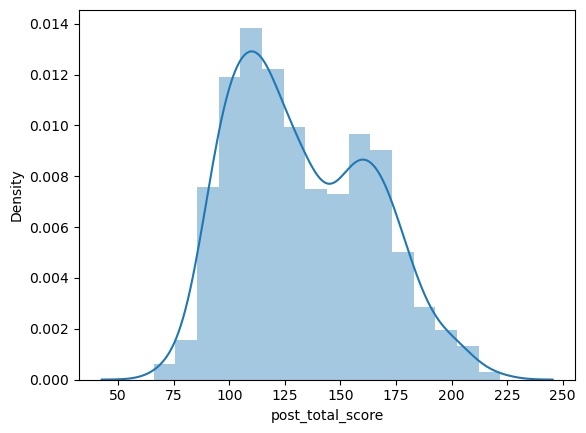

In [7]:
fig, ax = plt.subplots()

sns.distplot(training_df[training_df.turn == 13].post_total_score, ax = ax)

plt.show()

In [8]:
training_df[[f'hand_1_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.hand_1.to_list(), index = training_df.index)
training_df[[f'picks_1_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.dice_picks_1.to_list(), index = training_df.index)
training_df[[f'hand_2_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.hand_2.to_list(), index = training_df.index)
training_df[[f'picks_2_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.dice_picks_2.to_list(), index = training_df.index)
training_df[[f'hand_3_dice_{x}' for x in range(1,6)]] = pd.DataFrame(training_df.hand_3.to_list(), index = training_df.index)
training_df = training_df.drop(['hand_1', 'hand_2', 'hand_3', 'dice_picks_1', 'dice_picks_2'], axis = 1)
training_df

,game,turn,pre_total_score,chosen_score_type,turn_score,post_total_score,chance_score,ones_score,twos_score,threes_score,...,picks_2_dice_1,picks_2_dice_2,picks_2_dice_3,picks_2_dice_4,picks_2_dice_5,hand_3_dice_1,hand_3_dice_2,hand_3_dice_3,hand_3_dice_4,hand_3_dice_5
0,1,1,0,chance,23,23,23.0,NaN,NaN,NaN,...,1,1,1,0,0,6,5,5,5,2
1,1,2,23,full_house,25,48,23.0,NaN,NaN,NaN,...,1,1,1,1,1,5,5,5,2,2
2,1,3,48,three_kind,19,67,23.0,NaN,NaN,NaN,...,1,1,1,1,1,5,5,3,3,3
3,1,4,67,threes,6,73,23.0,NaN,NaN,6.0,...,0,1,1,0,0,3,3,2,2,1
4,1,5,73,fives,5,78,23.0,NaN,NaN,6.0,...,0,1,1,1,0,5,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,1000,9,148,four_kind,23,171,24.0,5.0,0.0,NaN,...,1,1,1,0,0,5,5,5,5,3
12996,1000,10,171,fives,5,176,24.0,5.0,0.0,NaN,...,0,1,1,1,1,5,1,1,1,1
12997,1000,11,176,threes,0,176,24.0,5.0,0.0,0.0,...,1,1,0,1,1,5,4,4,1,1
12998,1000,12,176,small_straight,0,176,24.0,5.0,0.0,0.0,...,0,1,1,1,0,5,4,4,4,2


In [9]:
training_df.columns

Index(['game', 'turn', 'pre_total_score', 'chosen_score_type', 'turn_score',
       'post_total_score', 'chance_score', 'ones_score', 'twos_score',
       'threes_score', 'fours_score', 'fives_score', 'sixes_score',
       'three_kind_score', 'four_kind_score', 'full_house_score',
       'small_straight_score', 'large_straight_score', 'yahtzee_score',
       'chance_potential', 'ones_potential', 'twos_potential',
       'threes_potential', 'fours_potential', 'fives_potential',
       'sixes_potential', 'three_kind_potential', 'four_kind_potential',
       'full_house_potential', 'small_straight_potential',
       'large_straight_potential', 'yahtzee_potential', 'hand_1_dice_1',
       'hand_1_dice_2', 'hand_1_dice_3', 'hand_1_dice_4', 'hand_1_dice_5',
       'picks_1_dice_1', 'picks_1_dice_2', 'picks_1_dice_3', 'picks_1_dice_4',
       'picks_1_dice_5', 'hand_2_dice_1', 'hand_2_dice_2', 'hand_2_dice_3',
       'hand_2_dice_4', 'hand_2_dice_5', 'picks_2_dice_1', 'picks_2_dice_2',
      

In [10]:
training_df.shape

(13000, 57)

In [11]:
training_df.to_csv('data/training_df.csv', index = False)